# Predictive analytics of medical insurance


- Aim of the problem is to find the health insurance cost incured by Individuals based on thier age, gender, BMI, number of children, smoking habit and geo-location. Features available are:

    - sex: insurance contractor gender, female, male

    - bmi: Body mass index (ideally 18.5 to 24.9)

    - children: Number of children covered by health insurance / Number of dependents

    - smoker: smoking habits

    - region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    - charges: Individual medical costs billed by health insurance


Data Source:https://www.kaggle.com/mirichoi0218/insurance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read the csv file 
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [1]:
# check if there are any Null values
insurance_df.isnull().sum()

In [3]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean()
df_region.head(2)

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374


In [5]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age.head(2)

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335


In [6]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
# convert categorical variable to numerical
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)
insurance_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,yes,southwest,16884.9240
1,18,1,33.77,1,no,southeast,1725.5523


In [8]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
# Convert categorical variable to numerical 
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)
insurance_df.head(2)

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.90,0,1,16884.9240,0,0,1
1,18,1,33.77,1,0,1725.5523,0,1,0


In [11]:
insurance_df.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe2f9d94d0>,
      dtype=object)

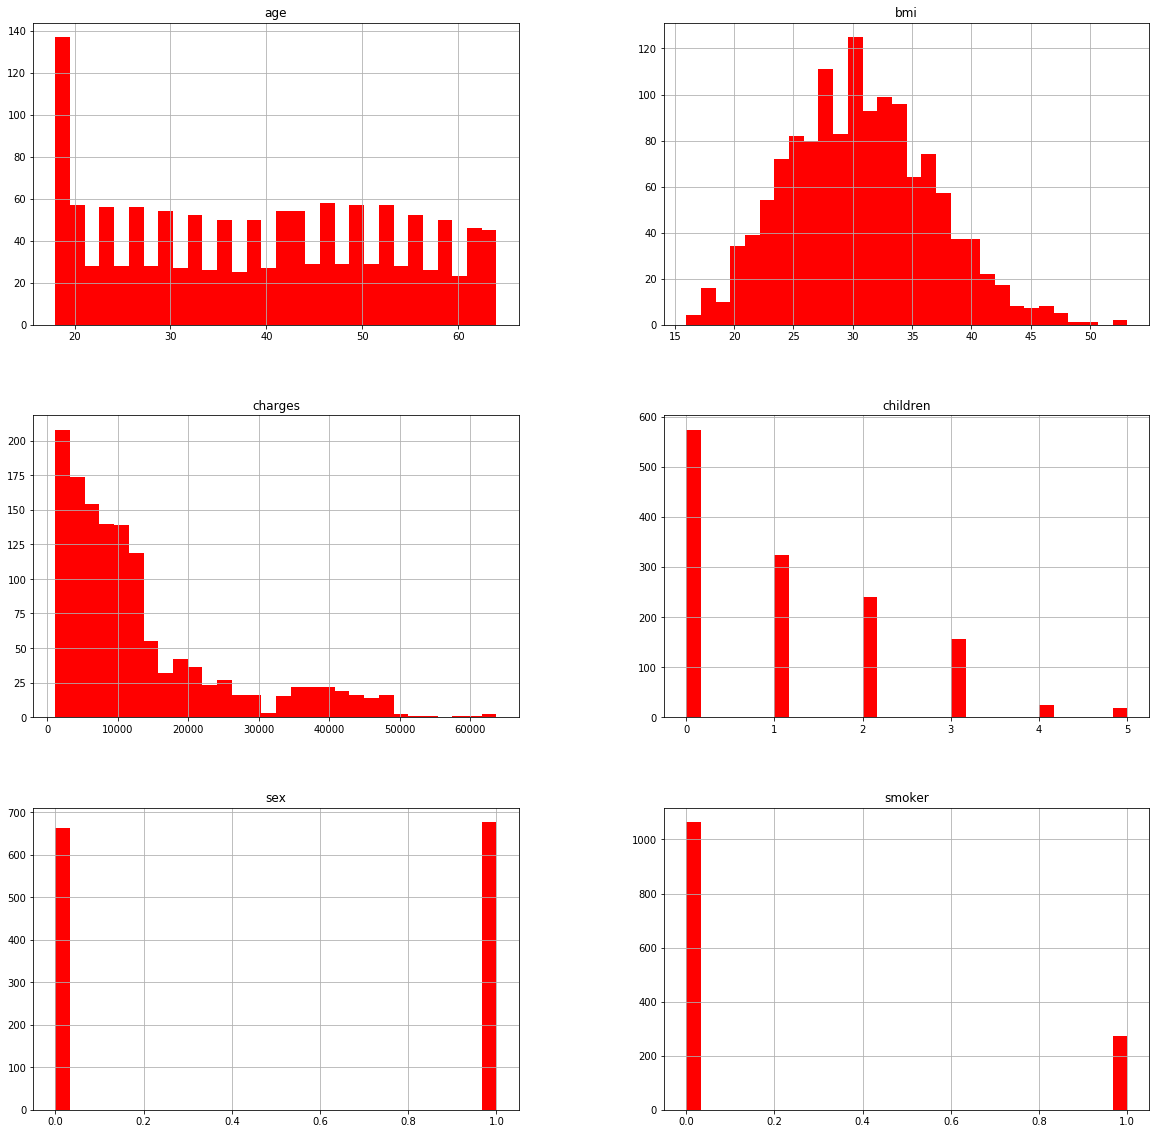

In [12]:
# Data Visualization
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (20,20), color = 'r')

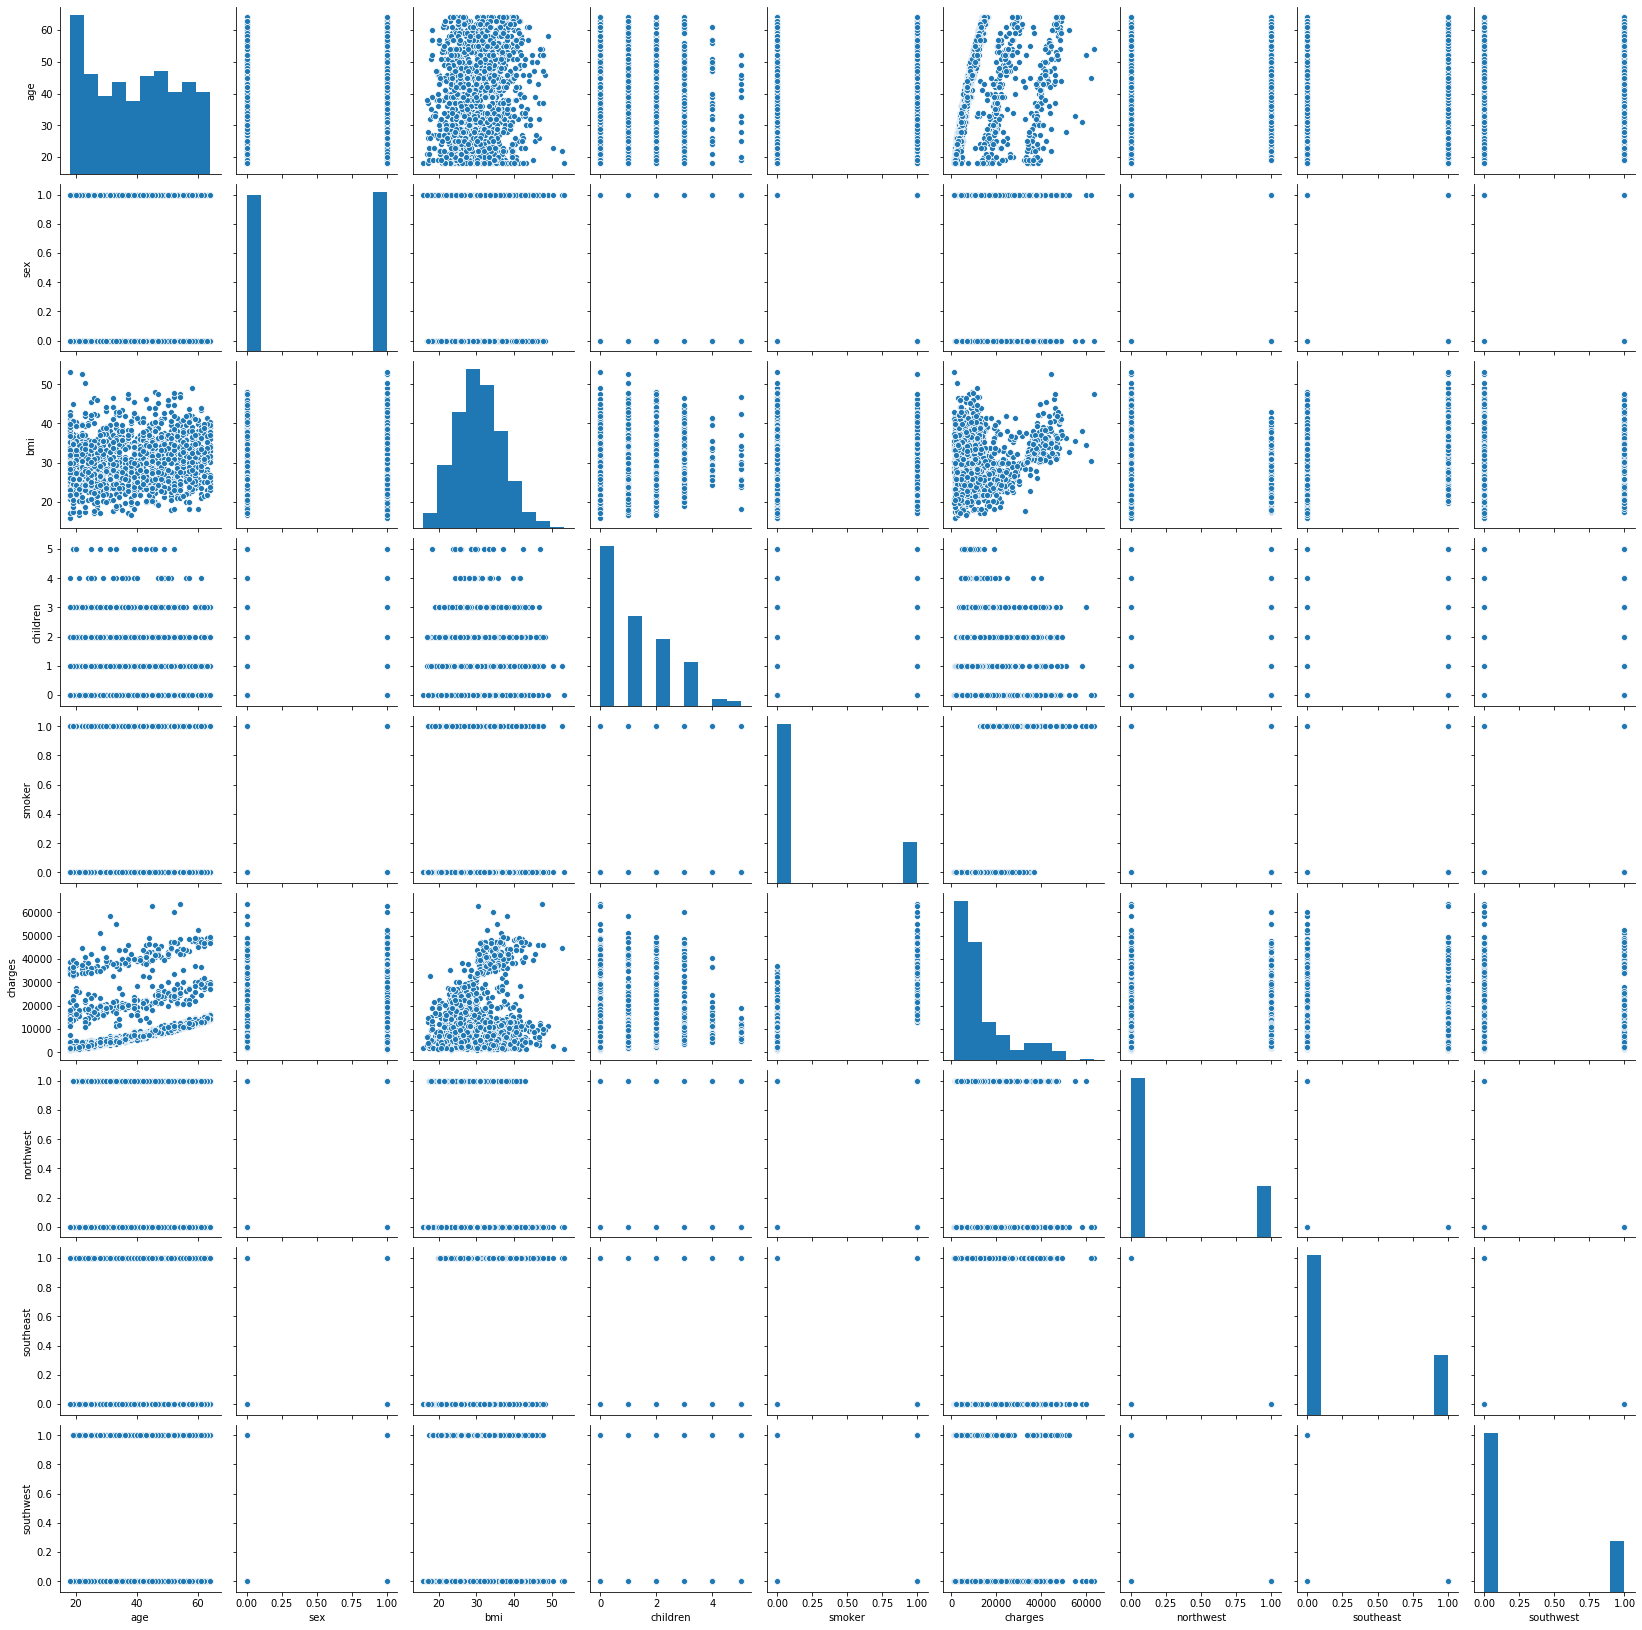

In [13]:
# plot pairplot
sns.pairplot(insurance_df)

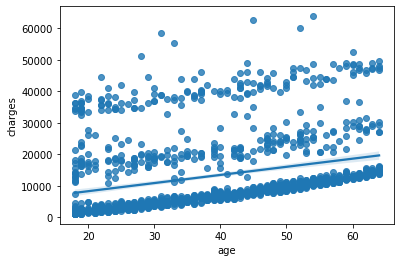

In [14]:
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()  

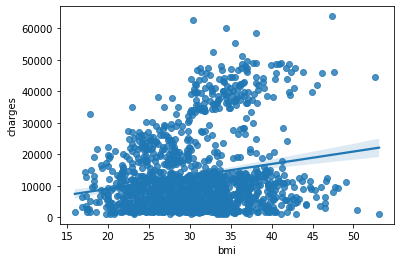

In [15]:
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)

In [16]:
corr = insurance_df.corr()
corr

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


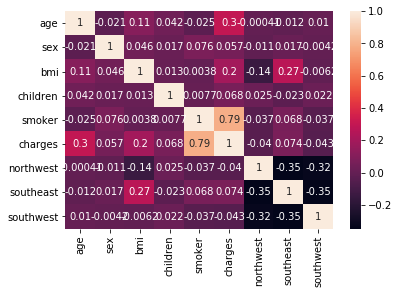

In [17]:
sns.heatmap(corr, annot = True)
# smoker and age have positive correlations with charges

In [18]:
# CREATE TRAINING AND TESTING DATASET
print(insurance_df.columns)
X = insurance_df.drop(columns =['charges'])
y = insurance_df['charges']
X.head(2)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')


,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.90,0,1,0,0,1
1,18,1,33.77,1,0,0,1,0


In [19]:
print(y.head(2))
X.shape, y.shape

0    16884.9240
1     1725.5523
Name: charges, dtype: float64


((1338, 8), (1338,))

In [20]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')
y = y.reshape(-1,1)
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

## Train multiplel linear model with scikit-learn

In [21]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape

((1070, 8), (268, 8), (1070, 1))

In [23]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression()
regresssion_model_sklearn.fit(X_train, y_train)
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.8097695911264126

In [24]:
y_predict = regresssion_model_sklearn.predict(X_test)
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

k = X_test.shape[1]
n = len(X_test)
n

268

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5810.159 
MSE = 33757950.0 
MAE = 4126.9937 
R2 = 0.8097695893372348 
Adjusted R2 = 0.8038937465368404


## Train learn learner model using SAGEMAKER

In [28]:
# Boto3 (AWS software) allows Python developer to use services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
sagemaker_session = sagemaker.Session()

# Let's define the S3 bucket and prefix that we want to use in this session
bucket = 'sagemaker-practical-111' # bucket named 'sagemaker-practical' was created beforehand
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# This is the IAM role that you created when you created your notebook instance. 
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::243861154105:role/service-role/AmazonSageMaker-ExecutionRole-20210217T212284


In [29]:
X_train.shape, y_train.shape, X_test.shape

((1070, 8), (1070, 1), (268, 8))

In [30]:
y_train = y_train[:,0]
y_train.shape

(1070,)

In [55]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it, reset that back to zero

0

In [56]:
import os
# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-practical-111/linear_learner/train/linear-train-data


In [57]:
# create an output placeholder in S3 bucket to store the linear learner output
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-practical-111/linear_learner/output


In [2]:
# This code is used to get the training container of sagemaker built-in algorithms
# from sagemaker.amazon.amazon_estimator import image_uris
from sagemaker import image_uris
container = sagemaker.image_uris.retrieve(boto3.Session().region_name, 'linear-learner')

In [3]:
linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

# Tune parameters 
linear.set_hyperparameters(feature_dim = 8,
                           predictor_type = 'regressor',
                           mini_batch_size = 30,
                           epochs = 20,  
                           num_models = 32,
                           loss = 'absolute_loss')
linear.fit({'train': s3_train_data})

In [62]:
# Deploying the model to perform inference 
linear_regressor = linear.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

-------------------!

In [71]:
from sagemaker.predictor import csv_serializer, json_deserializer

# linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [4]:
# making prediction on the test data
result = linear_regressor.predict(X_test)
predictions = np.array([r['score'] for r in result['predictions']])
y_predict_orig = scaler_y.inverse_transform(predictions)
y_test_orig = scaler_y.inverse_transform(y_test)

In [73]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 8069.24 
MSE = 65112631.796315365 
MAE = 4293.65285609031 
R2 = 0.6330818950499087 
Adjusted R2 = 0.6217485172908326


In [5]:
# Delete the end-point !!!
linear_regressor.delete_endpoint()

## Use Artificial Neural Network-based regression model

In [172]:
# !pip install tensorflow

In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [99]:
# optimizer = Adam()
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                450       
_________________________________________________________________
activation_12 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 150)               7650      
_________________________________________________________________
activation_13 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_14 (Activation)   (None, 150)              

In [100]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
43/43 [==============================] - 0s 5ms/step - loss: 0.6457 - val_loss: 0.2023
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3035 - val_loss: 0.1903
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2541 - val_loss: 0.1681
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2454 - val_loss: 0.1583
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2249 - val_loss: 0.1765
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2108 - val_loss: 0.1839
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1994 - val_loss: 0.1594
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.2164 - val_loss: 0.1739
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1947 - val_loss: 0.1723
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1936 - val_loss: 0.1663
Epoch 11/

In [101]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 1ms/step - loss: 0.2182
Accuracy : 0.7817749828100204


In [102]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

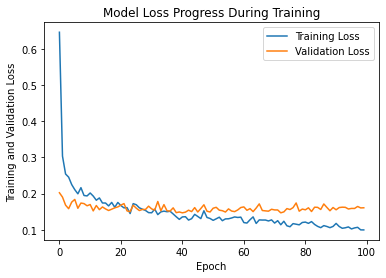

In [103]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

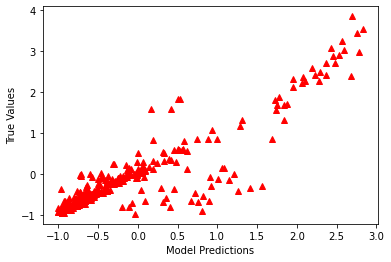

In [104]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

Text(0, 0.5, 'True Values')

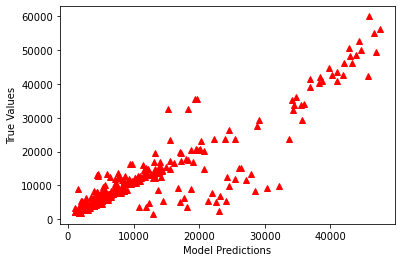

In [108]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [107]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5655.024 
MSE = 31979298.0 
MAE = 3436.618 
R2 = 0.7701607751407135 
Adjusted R2 = 0.7630614940639787
